In [78]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the confidiguration of the plots we will create

# Read in the data

df = pd.read_csv('/Users/henosgebrehiwot/Downloads/movies (1).csv')

In [60]:
# Let's look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


In [5]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing =  np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [6]:
# Data types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [50]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [62]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012
2200,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,Jonathan Nolan,2008,2008
3011,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,Chris Weitz,2016,2016
3088,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,Andrew Stanton,2016,2016
1310,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,George Lucas,1999,1999
2920,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,Joss Whedon,2015,2015


In [51]:
#Create correct Year Column

df['yearcorrect'] = df['released'].astype('str').str[0:4]


In [9]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000.0,George Films,UK,Brad Furman,Biography,15425870.0,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000.0,Lionsgate,USA,Dan Mazer,Comedy,35537564.0,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000.0,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779.0,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000.0,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871.0,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


In [80]:
df = df.sort_values(by=['gross'], inplace=False, ascending= False)

In [73]:
 #Display all the rows

pd.set_option('display.max_rows',500)

In [14]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

2422                                          micro_scope
1233                          Zucker Brothers Productions
1299                              Zentropa Entertainments
184                                  Zenith Entertainment
2191                                      Zazen Produ��es
334                                   Zanuck Company, The
255                           Zacharias-Buhai Productions
2175                           Young Hannibal Productions
2316                                          Yellow Bird
1257                                X-Filme Creative Pool
2722                              Worldview Entertainment
2612                                  Working Title Films
1700                                         Wiseau-Films
624                                         WingNut Films
2957                                       Wildgaze Films
2203                                           Wild Bunch
2012                      Wiedemann & Berg Filmproduktion
2685          

In [ ]:
# Budget is going to have a high correlation to the gross income
# The company that makes them will have a high correlation


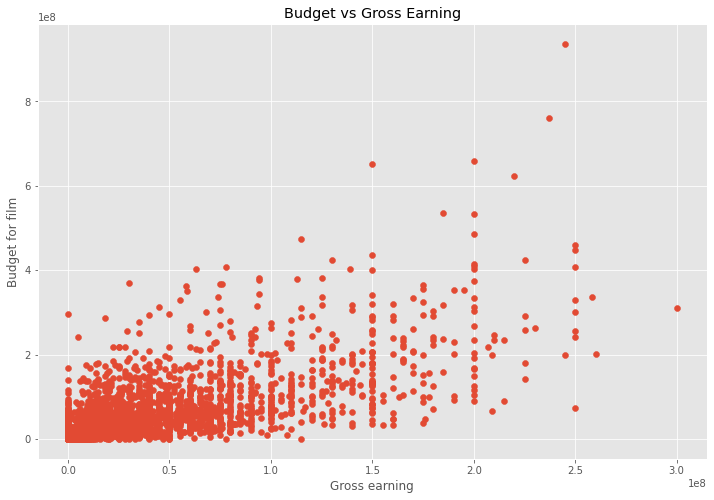

In [19]:
# Build a scatter plot with budget vs gross revenue


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')

plt.xlabel('Gross earning')

plt.ylabel('Budget for film')

plt.show()



In [81]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015
2302,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009
1100,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997
2916,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015
2603,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0.0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000.0,La salvaci�n,R,2015-02-27,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2014
1074,0.0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440.0,Pusher,NOT RATED,1996-08-30,105,7.4,Kim Bodnia,Jens Dahl,1996
2311,47000000.0,Pan Europ�enne,Belgium,Jaco Van Dormael,Drama,3600.0,Mr. Nobody,R,2013-09-26,141,7.9,Jared Leto,Jaco Van Dormael,2009
1466,5000000.0,Copperheart Entertainment,Canada,John Fawcett,Drama,2554.0,Feroz,UNRATED,2001-05-18,108,6.8,Emily Perkins,Karen Walton,2000


<AxesSubplot:xlabel='budget', ylabel='gross'>

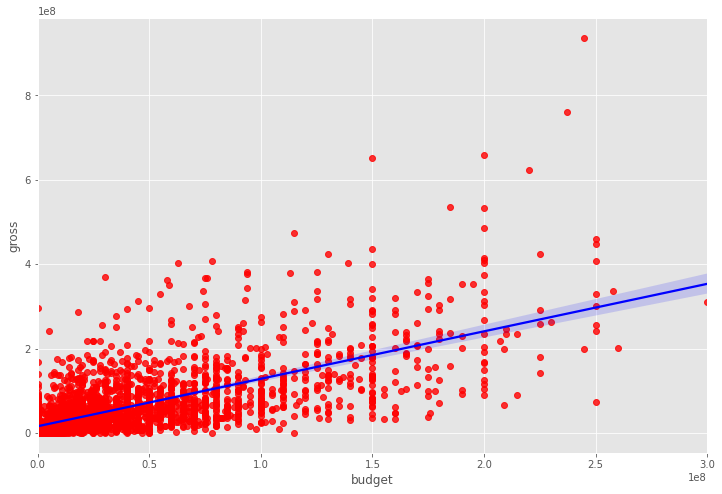

In [24]:
# Regression plot inorder to figure out if there is correlation between the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [ ]:
# Let's Start looking at correlation

In [48]:
df.corr(method = 'pearson') # Pearson, Kendall, spearman

,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


In [ ]:
# High Correlation between budget and gross
# The hypothesis was right

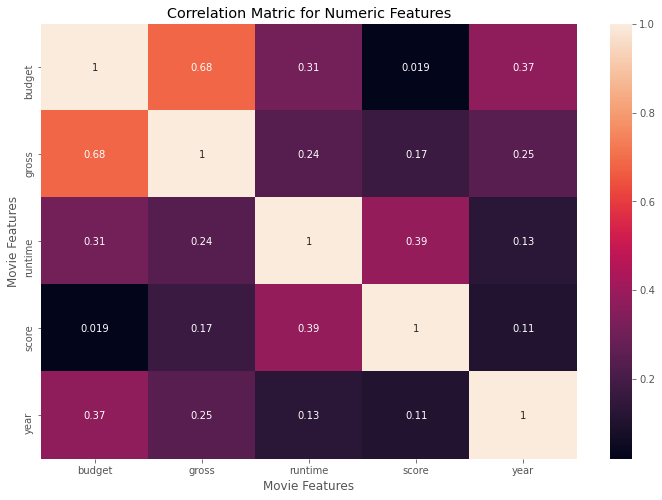

In [31]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [75]:
# Looks at company

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,1636,136,8.1,236,1106,2015,29
2302,237000000,837,36,478,0,760507625,219,5,1297,162,7.8,986,768,2009,23
1100,200000000,837,37,478,6,658672302,2852,5,643,194,7.8,699,768,1997,11
2916,150000000,846,37,207,0,652270625,1246,5,1606,124,7.0,203,1545,2015,29
2603,220000000,596,37,656,0,623357910,2276,5,1431,143,8.1,946,1010,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,894,9,706,6,5000,1310,6,1591,92,6.7,736,80,2014,29
1074,0,119,9,880,5,4440,1807,2,574,105,7.4,669,851,1996,10
2311,47000000,663,3,473,6,3600,1553,6,1511,141,7.9,499,764,2009,27
1466,5000000,265,5,584,6,2554,826,7,826,108,6.8,352,1033,2000,15


In [76]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,1636,136,8.1,236,1106,2015,29
2302,237000000,837,36,478,0,760507625,219,5,1297,162,7.8,986,768,2009,23
1100,200000000,837,37,478,6,658672302,2852,5,643,194,7.8,699,768,1997,11
2916,150000000,846,37,207,0,652270625,1246,5,1606,124,7.0,203,1545,2015,29
2603,220000000,596,37,656,0,623357910,2276,5,1431,143,8.1,946,1010,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,894,9,706,6,5000,1310,6,1591,92,6.7,736,80,2014,29
1074,0,119,9,880,5,4440,1807,2,574,105,7.4,669,851,1996,10
2311,47000000,663,3,473,6,3600,1553,6,1511,141,7.9,499,764,2009,27
1466,5000000,265,5,584,6,2554,826,7,826,108,6.8,352,1033,2000,15


In [77]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,1636,136,8.1,236,1106,2015,29
2302,237000000,837,36,478,0,760507625,219,5,1297,162,7.8,986,768,2009,23
1100,200000000,837,37,478,6,658672302,2852,5,643,194,7.8,699,768,1997,11
2916,150000000,846,37,207,0,652270625,1246,5,1606,124,7.0,203,1545,2015,29
2603,220000000,596,37,656,0,623357910,2276,5,1431,143,8.1,946,1010,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,894,9,706,6,5000,1310,6,1591,92,6.7,736,80,2014,29
1074,0,119,9,880,5,4440,1807,2,574,105,7.4,669,851,1996,10
2311,47000000,663,3,473,6,3600,1553,6,1511,141,7.9,499,764,2009,27
1466,5000000,265,5,584,6,2554,826,7,826,108,6.8,352,1033,2000,15


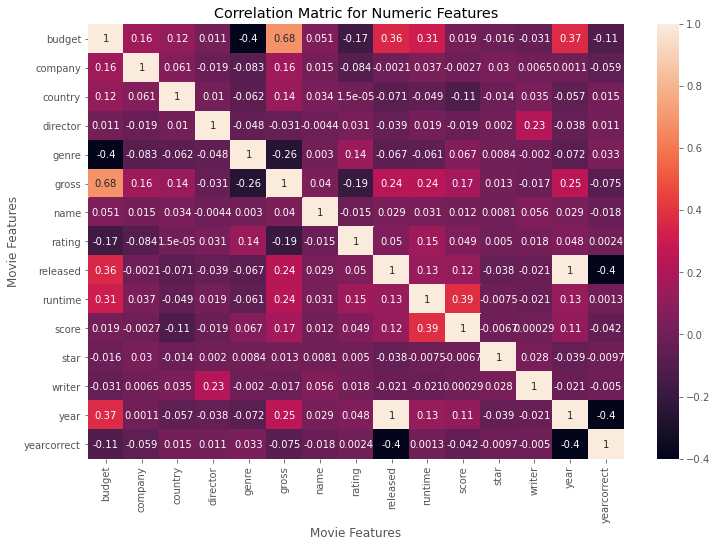

In [54]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [55]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
budget,1.000000,0.157083,0.118863,0.011052,-0.401052,0.682588,0.051049,-0.171070,0.364690,0.309652,0.019061,-0.016357,-0.031269,0.374904,-0.110294
company,0.157083,1.000000,0.061089,-0.018730,-0.083068,0.156013,0.014947,-0.083646,-0.002053,0.037491,-0.002730,0.030054,0.006527,0.001121,-0.059416
country,0.118863,0.061089,1.000000,0.010291,-0.062478,0.138064,0.034133,0.000015,-0.070944,-0.049398,-0.113568,-0.014146,0.035367,-0.057044,0.015162
director,0.011052,-0.018730,0.010291,1.000000,-0.048337,-0.031221,-0.004434,0.030589,-0.038601,0.018846,-0.018591,0.001973,0.227905,-0.037946,0.011225
genre,-0.401052,-0.083068,-0.062478,-0.048337,1.000000,-0.263051,0.002989,0.136055,-0.066830,-0.061327,0.067234,0.008380,-0.001986,-0.072299,0.032879
gross,0.682588,0.156013,0.138064,-0.031221,-0.263051,1.000000,0.039578,-0.191666,0.237240,0.238183,0.171825,0.013428,-0.017184,0.246975,-0.075205
name,0.051049,0.014947,0.034133,-0.004434,0.002989,0.039578,1.000000,-0.014934,0.029409,0.031283,0.011649,0.008144,0.055729,0.028571,-0.018282
rating,-0.171070,-0.083646,0.000015,0.030589,0.136055,-0.191666,-0.014934,1.000000,0.049616,0.153396,0.048781,0.004985,0.017506,0.048356,0.002362
released,0.364690,-0.002053,-0.070944,-0.038601,-0.066830,0.237240,0.029409,0.049616,1.000000,0.133181,0.120931,-0.037896,-0.021203,0.996873,-0.395272
runtime,0.309652,0.037491,-0.049398,0.018846,-0.061327,0.238183,0.031283,0.153396,0.133181,1.000000,0.386864,-0.007494,-0.020986,0.127864,0.001284


In [56]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.157083
             country        0.118863
             director       0.011052
             genre         -0.401052
             gross          0.682588
             name           0.051049
             rating        -0.171070
             released       0.364690
             runtime        0.309652
             score          0.019061
             star          -0.016357
             writer        -0.031269
             year           0.374904
             yearcorrect   -0.110294
company      budget         0.157083
             company        1.000000
             country        0.061089
             director      -0.018730
             genre         -0.083068
             gross          0.156013
             name           0.014947
             rating        -0.083646
             released      -0.002053
             runtime        0.037491
             score         -0.002730
             star           0.030054
 

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.401052
genre        budget        -0.401052
yearcorrect  year          -0.396055
year         yearcorrect   -0.396055
released     yearcorrect   -0.395272
yearcorrect  released      -0.395272
gross        genre         -0.263051
genre        gross         -0.263051
rating       gross         -0.191666
gross        rating        -0.191666
rating       budget        -0.171070
budget       rating        -0.171070
score        country       -0.113568
country      score         -0.113568
yearcorrect  budget        -0.110294
budget       yearcorrect   -0.110294
rating       company       -0.083646
company      rating        -0.083646
genre        company       -0.083068
company      genre         -0.083068
yearcorrect  gross         -0.075205
gross        yearcorrect   -0.075205
genre        year          -0.072299
year         genre         -0.072299
country      released      -0.070944
released     country       -0.070944
             genre         -0.066830
g

In [59]:
high_corr= sorted_pairs[(sorted_pairs) > 0.5]

high_corr

budget       gross          0.682588
gross        budget         0.682588
released     year           0.996873
year         released       0.996873
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Company has low correlation
# The Hypothesis was wrong